### Convlutional Neural Network with Fashion MNIST

In [109]:
import numpy as np
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout
from keras.layers import Flatten, InputLayer, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant
import keras



from keras.utils.np_utils import to_categorical
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
!pip install python-mnist

In [88]:
from mnist import MNIST
mndata = MNIST('/data')
X_train,Y_train = mndata.load_training()
X_test,Y_test = mndata.load_testing()

In [90]:
# Convert list to array
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [91]:
# Look at the shape
print "X_Train shape is ", X_train.shape
print "Y_Train shape is ", Y_train.shape

print "X_Test shape is ", X_test.shape
print "Y_Test shape is ", Y_test.shape

X_Train shape is  (60000, 784)
Y_Train shape is  (60000,)
X_Test shape is  (10000, 784)
Y_Test shape is  (10000,)


In [133]:
# Reshape X
# input image dimensions
img_rows, img_cols = 28, 28

X_train2 = X_train.reshape(X_train.shape[0], img_rows, img_cols)
X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols)

Actual Label is: 9


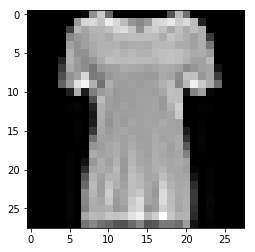

In [148]:
# Look at a picture in the training data

plt.imshow(X_train2[10],cmap='gray')
print "Actual Label is: {}".format(Y_train[0])

In [94]:
#convert integer to float

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255


In [95]:
X_train.shape

(60000, 784)

In [96]:
### Convert Y values to Categorical 

Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

## Final Architecture

In [97]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [121]:
K.clear_session()
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10,activation = 'sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Nadam(),metrics=['accuracy'])

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.fit(X_train,Y_train_cat,batch_size = 128,epochs = 2,verbose = 2,validation_data=(X_test, Y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
34s - loss: 0.4606 - acc: 0.8374 - val_loss: 0.3545 - val_acc: 0.8676
Epoch 2/2
34s - loss: 0.2861 - acc: 0.8973 - val_loss: 0.2848 - val_acc: 0.8943


In [124]:
model.evaluate(X_test,Y_test_cat)

 9888/10000 [============================>.] - ETA: 0s

[0.28481964348554611, 0.89429999999999998]

Actual Label is: 1


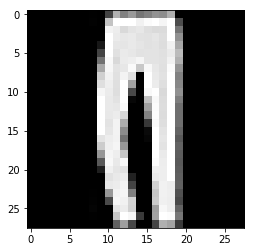

In [149]:
plt.imshow(X_test2[2],cmap='gray')
print "Actual Label is: {}".format(Y_test[2])

In [150]:
# Predicted Value

print(np.argmax(model.predict(X_test)[2]))

1


In [151]:
# Actual Value

print(Y_test[2])

1
